In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Downloads/train.csv')

In [3]:
df.shape

(42000, 785)

In [4]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [34]:
data = df.values #shuffle to get different values everytime we show image
np.random.shuffle(data)
X= data[:,1:] #pixel values of image
Y= data[:,0] #labels of image

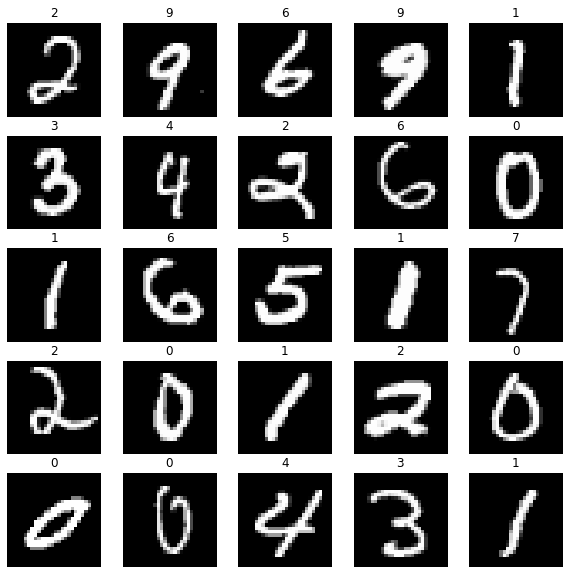

In [35]:
#Visualising Image
# X.shape - (42000, 784) and X[0].shape=(784, ) Each image is of size 28*28
def drawImg(X,Y,i):
    plt.imshow(X[i].reshape(28,28),cmap='gray')
    plt.title(Y[i])
    plt.show
    
#drawImg(X,Y,0)    
#visualising image as grid of images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) #starts from 1
    plt.imshow(X_train[i].reshape(28,28),cmap='gray')
    plt.axis('off')
    plt.title(Y_train[i])
    plt.show

In [36]:
#splitting dataset
split = int (0.80 *(X.shape[0]))
X_train , Y_train = X[:split, :], Y[:split]
X_test , Y_test = X[split:, :], Y[split:]

#split from sklearn
#from sklearn.model_selection import train_test_split
#Xtrain, Xtest , Ytrain, Ytest = train_test_split(X,Y,test_size=0.2,random_state=5)

In [37]:
#applying knn
def dis(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals=[]
    m= X.shape[0]
    for i in range(m):
        d= dis(queryPoint,X[i])
        vals.append((d, Y[i]))
    vals= sorted(vals)
    vals =vals[:k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:,1],return_counts=True)
    max_freq = new_vals[1].argmax()
    pred = new_vals[0][max_freq]
    return pred

In [38]:
#making predictions
p = knn(X_train, Y_train,X_test[0])
print(int(p))

3


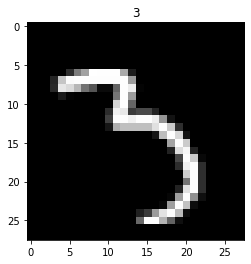

In [39]:
drawImg(X_test, Y_test , 0)

In [40]:
np.unique(Y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([818, 933, 836, 863, 844, 732, 840, 878, 836, 820]))

In [41]:
outputs = []
for i in range(100):
    pred = knn(X_train,Y_train,X_test[i])
    outputs.append(pred)
    if i%10==0:
        print(i,end='\r')
    
outputs = np.array(outputs)

In [42]:
print(outputs)

[3. 5. 1. 0. 9. 7. 0. 5. 5. 0. 4. 8. 2. 9. 3. 3. 1. 0. 5. 4. 8. 5. 2. 7.
 3. 4. 0. 3. 7. 1. 1. 0. 2. 8. 5. 1. 0. 3. 8. 4. 2. 3. 1. 1. 3. 1. 2. 5.
 1. 7. 3. 6. 8. 7. 3. 1. 8. 3. 8. 3. 6. 1. 2. 9. 9. 7. 4. 3. 8. 8. 1. 4.
 9. 9. 4. 7. 1. 3. 6. 2. 5. 3. 1. 7. 8. 6. 2. 0. 3. 6. 2. 6. 8. 4. 0. 4.
 2. 7. 5. 6.]


In [43]:
acc = np.sum(outputs==Y_test[:100])/100.0

In [44]:
print(acc)

0.97
